In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
# Reading the data on which analysis needs to be done
retail = pd.read_excel('Online Retail.xlsx')

In [5]:
## Understanding the data
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# shape of df
retail.shape

(541909, 8)

In [7]:
# df info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# df description
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
#Identify where the missing values are in the columns
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# remove rows with missing values and negative quantity
retail = retail[retail.Quantity > 0]

In [11]:
#remove the missing values in customerID column due to uniqueness of the missing values
retail = retail.dropna(subset=['CustomerID'])
#remove the rows with missing values in the description column because every product is unique
retail = retail.dropna(subset=['Description'])

In [12]:
# create a new column called "Revenue" by multiplying Quantity and UnitPrice
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

In [13]:
# group by CustomerID and calculate total revenue for each customer
customer_df = retail.groupby('CustomerID').agg({'Revenue': sum}).reset_index()

In [14]:
# extract features to use for clustering
X = customer_df[['Revenue']]

In [15]:
# normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# PCA for dimensionality reduction
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

In [17]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

For n_clusters=3, the silhouette score is 0.9594141909899798
For n_clusters=4, the silhouette score is 0.9548107036071567
For n_clusters=5, the silhouette score is 0.8443578288548045
For n_clusters=6, the silhouette score is 0.780931282846715
For n_clusters=7, the silhouette score is 0.8056197297827463
For n_clusters=8, the silhouette score is 0.7393994928131266


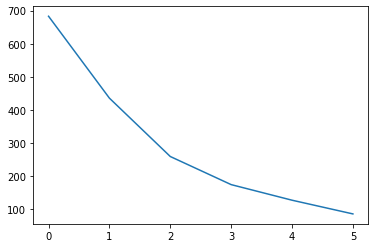

In [18]:
# plot the SSDs for each n_clusters
plt.plot(ssd)

# Silhouette analysis
range_n_clusters = [3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [19]:
# perform KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

In [20]:
#calculate silhouette score to evaluate the performance of KMeans clustering
silhouette_avg_kmeans = silhouette_score(X_scaled, labels_kmeans)

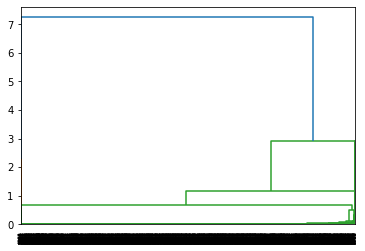

In [33]:
## Hierarchical Clustering
# Single linkage: 
mergings = linkage(X_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

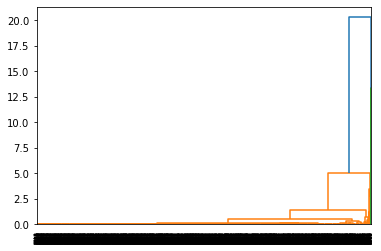

In [34]:
# Average linkage
mergings = linkage(X_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# calculate silhouette score to evaluate the performance of hierarchical clustering
silhouette_avg_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
silhouette_avg_hierarchical

0.9545044841726191

In [38]:
# Clustering with 3 clusters
clusters = fcluster(linkage_matrix, 3, criterion='maxclust')

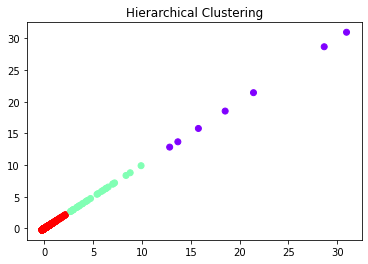

In [39]:
# Scatter plot of the clusters
plt.scatter(X_pca[:, 0], X_pca[:,0], c=clusters, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

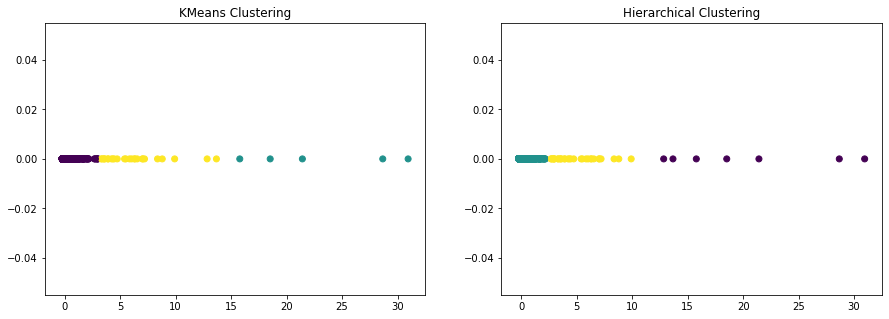

In [48]:
# visualize the clusters using scatter plot
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(X_scaled[:, 0], np.zeros(len(X_scaled)), c=labels_kmeans, cmap='viridis')
ax[0].set_title('KMeans Clustering')
ax[1].scatter(X_scaled[:, 0], np.zeros(len(X_scaled)), c=labels_hierarchical, cmap='viridis')
ax[1].set_title('Hierarchical Clustering')
plt.show()

In [49]:
#print silhouette score and accuracy score
print('Silhouette score for KMeans clustering: ', silhouette_avg_kmeans)
print('Silhouette score for hierarchical clustering: ', silhouette_avg_hierarchical)

Silhouette score for KMeans clustering:  0.9615920242328044
Silhouette score for hierarchical clustering:  0.9545044841726191


In [44]:
#encode the customer segments as categorical variables
customer_df['Segment'] = labels_kmeans
le = LabelEncoder()
customer_df['Segment_encoded'] = le.fit_transform(customer_df['Segment'])

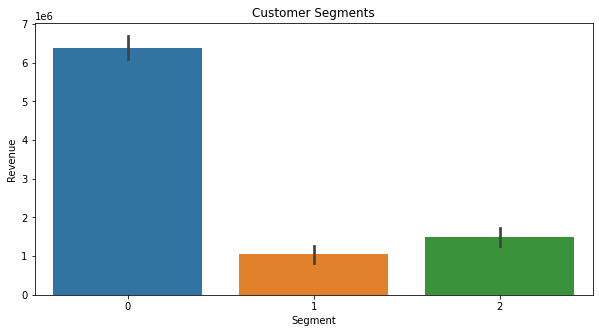

In [50]:
#visualize the segments using a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='Segment_encoded', y='Revenue', data=customer_df, estimator=sum)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Revenue')
plt.show()